In [1]:
# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [3]:
data=pd.read_csv('EconomiesOfScale.csv')
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
x = data.iloc[:,0].values
y = data.iloc[:,-1].values

In [5]:
x.shape,y.shape

((1000,), (1000,))

# Taking care of missing data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [7]:
data.isna().sum()

Number of Units       0
Manufacturing Cost    0
dtype: int64

# Visualising the data

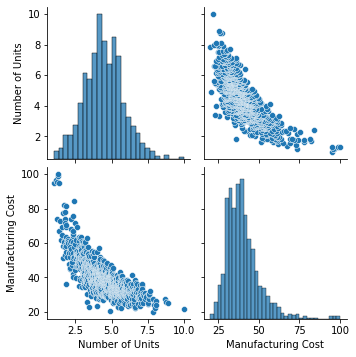

In [8]:
sns.pairplot(data)

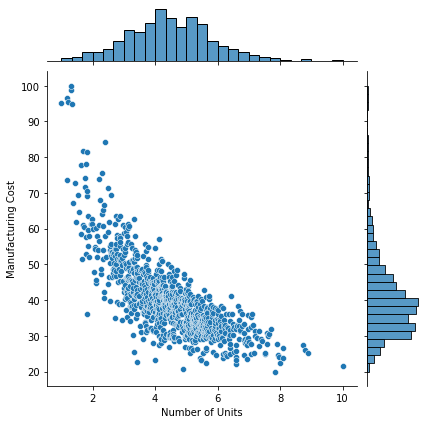

In [9]:
sns.jointplot(data=data,x='Number of Units',y='Manufacturing Cost')

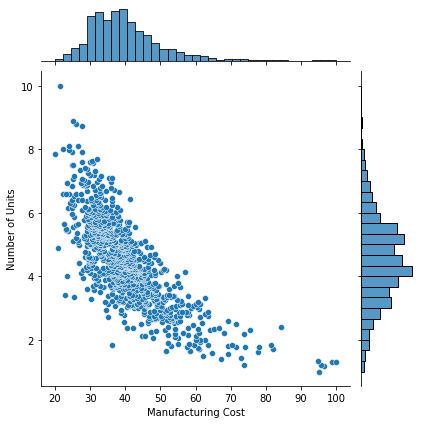

In [10]:
sns.jointplot(data=data,y='Number of Units',x='Manufacturing Cost')

# Train the model

In [11]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [12]:
linear_model.fit(x.reshape(-1,1),y)

LinearRegression()

In [13]:
print('m : ',linear_model.coef_)
print('b : ',linear_model.intercept_)

m :  [-6.0333683]
b :  67.03904193389238


# Visualise the Results

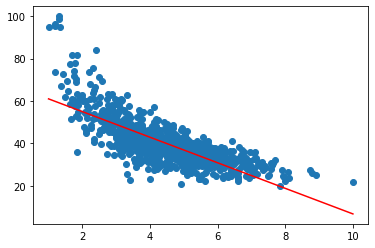

In [14]:
plt.scatter(x,y)
plt.plot(x.reshape(-1,1),linear_model.predict(x.reshape(-1,1)),color='Red')

# Evaluate the model

In [15]:
from sklearn.metrics import r2_score
r2_score(y,linear_model.predict(x.reshape(-1,1)))

0.5789767558506287

# Polynomial with degree=2 ,3 ,4 ,5 ,14:

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_model1=PolynomialFeatures(degree=2)
poly_model2=PolynomialFeatures(degree=3)
poly_model3=PolynomialFeatures(degree=4)
poly_model4=PolynomialFeatures(degree=5)
poly_model5=PolynomialFeatures(degree=11)

In [17]:
new_x1=poly_model1.fit_transform(x.reshape(-1,1))
new_x2=poly_model2.fit_transform(x.reshape(-1,1))
new_x3=poly_model3.fit_transform(x.reshape(-1,1))
new_x4=poly_model4.fit_transform(x.reshape(-1,1))
new_x5=poly_model5.fit_transform(x.reshape(-1,1))

In [18]:
from sklearn.linear_model import LinearRegression
linear_model1=LinearRegression()
linear_model1.fit(new_x1,y)

linear_model2=LinearRegression()
linear_model2.fit(new_x2,y)

linear_model3=LinearRegression()
linear_model3.fit(new_x3,y)

linear_model4=LinearRegression()
linear_model4.fit(new_x4,y)

linear_model5=LinearRegression()
linear_model5.fit(new_x5,y)

LinearRegression()

# Polynomial with degree=2

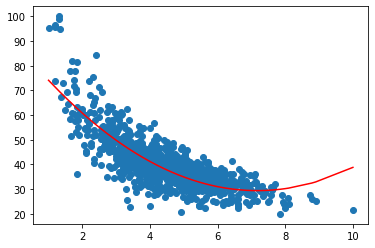

In [19]:
plt.scatter(x,y)
plt.plot(x,linear_model1.predict(new_x1),color='Red')

In [20]:
from sklearn.metrics import r2_score

deg_2=r2_score(y,linear_model1.predict(new_x1))
deg_2

0.6650268116056028

# Polynomial with degree=3

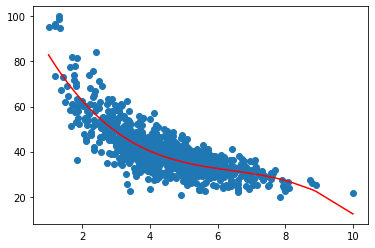

In [21]:
plt.scatter(x,y)
plt.plot(x,linear_model2.predict(new_x2),color='Red')

In [22]:
from sklearn.metrics import r2_score

deg_3=r2_score(y,linear_model2.predict(new_x2))
deg_3

0.687325124688785

# Polynomial with degree=4

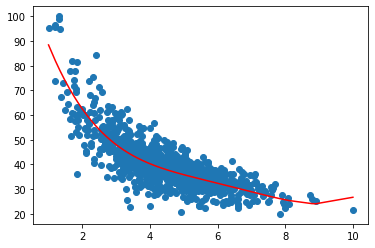

In [23]:
plt.scatter(x,y)
plt.plot(x,linear_model3.predict(new_x3),color='Red')

In [24]:
from sklearn.metrics import r2_score
deg_4=r2_score(y,linear_model3.predict(new_x3))
deg_4

0.6931523968815352

# Polynomial with degree=5

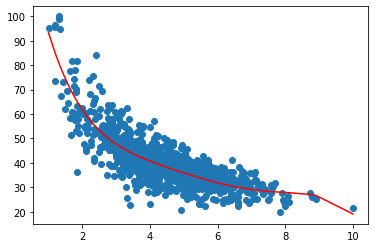

In [25]:
plt.scatter(x,y)
plt.plot(x,linear_model4.predict(new_x4),color='Red')

In [26]:
from sklearn.metrics import r2_score
deg_5=r2_score(y,linear_model4.predict(new_x4))
deg_5

0.6961040568996412

# Polynomial with degree=14

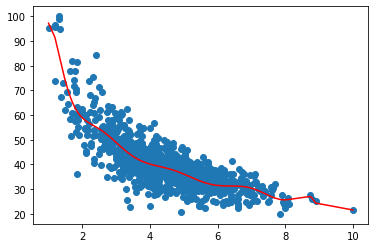

In [27]:
plt.scatter(x,y)
plt.plot(x,linear_model5.predict(new_x5),color='Red')

In [28]:
from sklearn.metrics import r2_score
deg_14=r2_score(y,linear_model5.predict(new_x5))
deg_14

0.7045447146755962